**Data Cleaning**

*   data_taksi: Variabel untuk menyimpan dataset asli setelah pemuatan.
*   data_bersih: Variabel yang menyimpan dataset setelah proses pembersihan.
*   cek_missing_akhir: Variabel untuk menyimpan jumlah nilai yang hilang setelah proses pembersihan.
*   ringkasan_akhir: Variabel untuk menampilkan statistik deskriptif setelah data dibersihkan.









In [3]:
# Menghubungkan Google Drive ke Google Colab
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Mengimpor pandas untuk manipulasi data
import pandas as pd

# Mengakses dataset dari Google Drive
file_path = '/content/drive/My Drive/Purwadhika - Data Science/nyctlctriprecord.csv'
data_taksi = pd.read_csv(file_path, low_memory=False)

Mounted at /content/drive


In [4]:
# Menghapus kolom 'ehail_fee' karena 100% nilainya kosong (missing)
data_bersih = data_taksi.drop(columns=['ehail_fee'])

**1. Menghapus Kolom yang Sepenuhnya Kosong**
  
  [link text](https://)Tujuan: Kolom ehail_fee dihapus karena seluruh datanya kosong (100% missing values), sehingga tidak memberikan informasi yang berguna untuk analisis.
  
  Alasan: Menghapus kolom yang sepenuhnya kosong adalah praktik umum karena kolom tersebut tidak memiliki nilai informasi yang relevan, dan menghapusnya akan membuat data lebih ringkas dan fokus pada kolom yang mengandung data.






In [5]:
# Menghapus baris yang memiliki missing values di kolom-kolom penting lainnya
data_bersih = data_bersih.dropna()

**2. Menghapus Baris yang Memiliki Missing Values di Kolom-Kolom Penting**

Tujuan: Setelah menghapus kolom ehail_fee, langkah selanjutnya adalah menghapus baris yang memiliki missing values di kolom-kolom lain.

Alasan: Kolom-kolom yang tersisa dianggap penting, dan setiap missing value dalam kolom tersebut dapat mengganggu analisis atau menghasilkan hasil yang tidak akurat. Dengan menghapus baris-baris ini, kita memastikan dataset bersih dari missing values, sehingga analisis dapat dilakukan dengan data yang lengkap dan konsisten.

In [6]:
# Mengubah nilai yang tidak logis atau negatif menjadi None (NaN) untuk kemudian dihapus
data_bersih['fare_amount'] = data_bersih['fare_amount'].apply(lambda x: x if x >= 0 else None)
data_bersih['total_amount'] = data_bersih['total_amount'].apply(lambda x: x if x >= 0 else None)
data_bersih['mta_tax'] = data_bersih['mta_tax'].apply(lambda x: x if x >= 0 else None)
data_bersih['improvement_surcharge'] = data_bersih['improvement_surcharge'].apply(lambda x: x if x >= 0 else None)
data_bersih['congestion_surcharge'] = data_bersih['congestion_surcharge'].apply(lambda x: x if x >= 0 else None)

**3. Menangani Tarif Negatif atau Biaya Tidak Logis**

Tujuan: Menandai nilai negatif dalam kolom-kolom biaya, seperti fare_amount dan total_amount, sebagai None.

Alasan: Dalam konteks perjalanan taksi, tarif atau biaya tambahan yang negatif tidak masuk akal, karena seharusnya bernilai positif atau nol. Nilai negatif mungkin disebabkan oleh kesalahan input atau pencatatan, sehingga lebih baik ditandai untuk dihapus.

In [7]:
data_bersih['trip_distance'] = data_bersih['trip_distance'].apply(lambda x: x if x < 100 else None)  # Membatasi jarak maksimal 100 mil

**4. Membatasi Jarak Perjalanan yang Masuk Akal**

Tujuan: Menandai jarak perjalanan di atas 100 mil sebagai None.

Alasan: Sebagai batasan yang logis untuk perjalanan taksi dalam kota, jarak perjalanan lebih dari 100 mil kemungkinan besar merupakan outlier atau kesalahan. Dengan membatasi jarak pada angka yang realistis, analisis selanjutnya akan lebih akurat.


In [8]:
data_bersih['tip_amount'] = data_bersih['tip_amount'].apply(lambda x: x if x < 100 else None)  # Membatasi tip maksimal 100

**5. Membatasi Jumlah Tip yang Realistis**

Tujuan: Menandai nilai tip di atas 100 sebagai None.

Alasan: Nilai tip yang sangat tinggi (>100) mungkin terjadi karena kesalahan input atau pencatatan. Dengan membatasi tip pada angka yang wajar, data lebih konsisten dan lebih realistis untuk dianalisis.

In [9]:
# Menghapus baris dengan NaN (None) yang muncul akibat penanganan outliers di atas
data_bersih = data_bersih.dropna()

**6. Menghapus Baris dengan NaN (None) yang Muncul Akibat Penanganan Outliers**

Tujuan:
Menghapus Baris yang Mengandung Nilai NaN: Setelah kita mengganti nilai yang
tidak logis atau outliers dengan None (atau NaN), langkah ini bertujuan untuk menghapus semua baris yang mengandung NaN.

Alasan:
*   Menghindari Anomali dalam Analisis: Nilai NaN dalam dataset bisa mengganggu analisis dan perhitungan statistik, terutama jika ada kolom numerik atau tanggal yang diperlukan untuk analisis selanjutnya.
*   Menjaga Integritas Data: Menghapus baris dengan NaN memastikan bahwa setiap kolom dalam dataset memiliki data yang valid dan lengkap, sehingga analisis dapat dilakukan dengan data yang bersih dan akurat.

In [10]:
# Langkah 3: Memastikan format datetime
# Mengonversi kolom pickup dan dropoff menjadi format datetime
data_bersih['lpep_pickup_datetime'] = pd.to_datetime(data_bersih['lpep_pickup_datetime'], errors='coerce')
data_bersih['lpep_dropoff_datetime'] = pd.to_datetime(data_bersih['lpep_dropoff_datetime'], errors='coerce')


<ipython-input-10-8978e8d86cd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bersih['lpep_pickup_datetime'] = pd.to_datetime(data_bersih['lpep_pickup_datetime'], errors='coerce')


**7. Mengonversi Kolom Pickup dan Dropoff Menjadi Format Datetime**

Tujuan: Mengubah Kolom Waktu ke Format Datetime: Langkah ini mengonversi kolom lpep_pickup_datetime dan lpep_dropoff_datetime dari teks (string) menjadi format datetime.

Alasan:
*   Kemudahan Analisis Waktu: Dengan format datetime, kita bisa melakukan analisis waktu secara lebih efisien, seperti menghitung durasi perjalanan, melihat pola perjalanan berdasarkan jam atau hari, dan menyusun data secara kronologis.
*   Konsistensi Data: Format datetime memastikan data waktu konsisten dan dapat digunakan dalam berbagai fungsi yang membutuhkan data waktu secara akurat.

Parameter errors='coerce'
Mengatasi Error pada Format Tidak Valid: Parameter errors='coerce' akan otomatis mengonversi nilai yang tidak sesuai format ke NaT (Not a Time).

Artinya, jika ada nilai yang tidak dapat dikonversi ke format datetime, nilai tersebut akan berubah menjadi NaT alih-alih menimbulkan error. Ini berguna untuk memastikan seluruh kolom berhasil dikonversi tanpa menghentikan proses jika ada kesalahan pada nilai tertentu.


In [11]:
# Pengecekan akhir untuk memastikan tidak ada lagi missing values dan data bersih
cek_missing_akhir = data_bersih.isnull().sum()
ringkasan_akhir = data_bersih.describe()

**8. Pengecekan Akhir untuk Memastikan Data Bersih**

Tujuan:
*   Memastikan Tidak Ada Missing Values: Langkah ini memeriksa kembali jumlah missing values di seluruh kolom dataset untuk memastikan tidak ada nilai yang kosong setelah proses data cleaning.
*   Ringkasan Statistik: data_bersih.describe() memberikan ringkasan statistik deskriptif pada kolom-kolom numerik, seperti rata-rata, nilai minimum dan maksimum, serta kuartil. Ini berguna untuk melihat rentang nilai setelah data cleaning.

Alasan:
*   Verifikasi Data Bersih: Dengan isnull().sum(), kita dapat memastikan bahwa seluruh missing values telah dihapus. Ini penting agar dataset siap digunakan tanpa gangguan dari nilai kosong.
*   Validasi Data Logis: Melalui describe(), kita dapat meninjau kembali apakah rentang dan distribusi data pada kolom numerik sudah logis dan sesuai konteks, misalnya tidak ada nilai negatif yang tersisa pada kolom biaya atau jarak perjalanan yang tidak wajar.

In [12]:
# Menampilkan hasil akhir untuk memastikan data sudah bersih
cek_missing_akhir, ringkasan_akhir

(VendorID                 0
 lpep_pickup_datetime     0
 lpep_dropoff_datetime    0
 store_and_fwd_flag       0
 RatecodeID               0
 PULocationID             0
 DOLocationID             0
 passenger_count          0
 trip_distance            0
 fare_amount              0
 extra                    0
 mta_tax                  0
 tip_amount               0
 tolls_amount             0
 improvement_surcharge    0
 total_amount             0
 payment_type             0
 trip_type                0
 congestion_surcharge     0
 dtype: int64,
            VendorID           lpep_pickup_datetime  \
 count  63700.000000                          63700   
 mean       1.855495  2023-01-16 20:35:40.381601536   
 min        1.000000            2009-01-01 20:21:27   
 25%        2.000000  2023-01-09 12:28:56.249999872   
 50%        2.000000            2023-01-17 08:47:45   
 75%        2.000000     2023-01-24 16:18:15.500000   
 max        2.000000            2023-02-01 03:10:05   
 std        0

**7. Output**

*   cek_missing_akhir: Menunjukkan jumlah missing values pada setiap kolom. Hasilnya harus menunjukkan semua kolom bernilai 0 jika data sudah bersih.
*   ringkasan_akhir: Memberikan statistik deskriptif yang memungkinkan kita untuk melihat konsistensi data.

**Data Visualization**

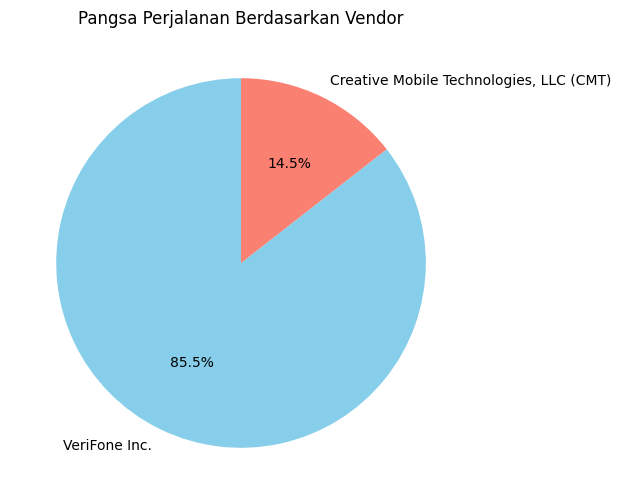

In [13]:
import matplotlib.pyplot as plt

# Menghitung jumlah perjalanan untuk masing-masing vendor
jumlah_perjalanan_vendor = data_bersih['VendorID'].value_counts()

# Membuat pie chart untuk menunjukkan pangsa perjalanan antara CMT dan VeriFone
plt.figure(figsize=(8, 6))
plt.pie(jumlah_perjalanan_vendor, labels=['VeriFone Inc.', 'Creative Mobile Technologies, LLC (CMT)'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Pangsa Perjalanan Berdasarkan Vendor')
plt.show()

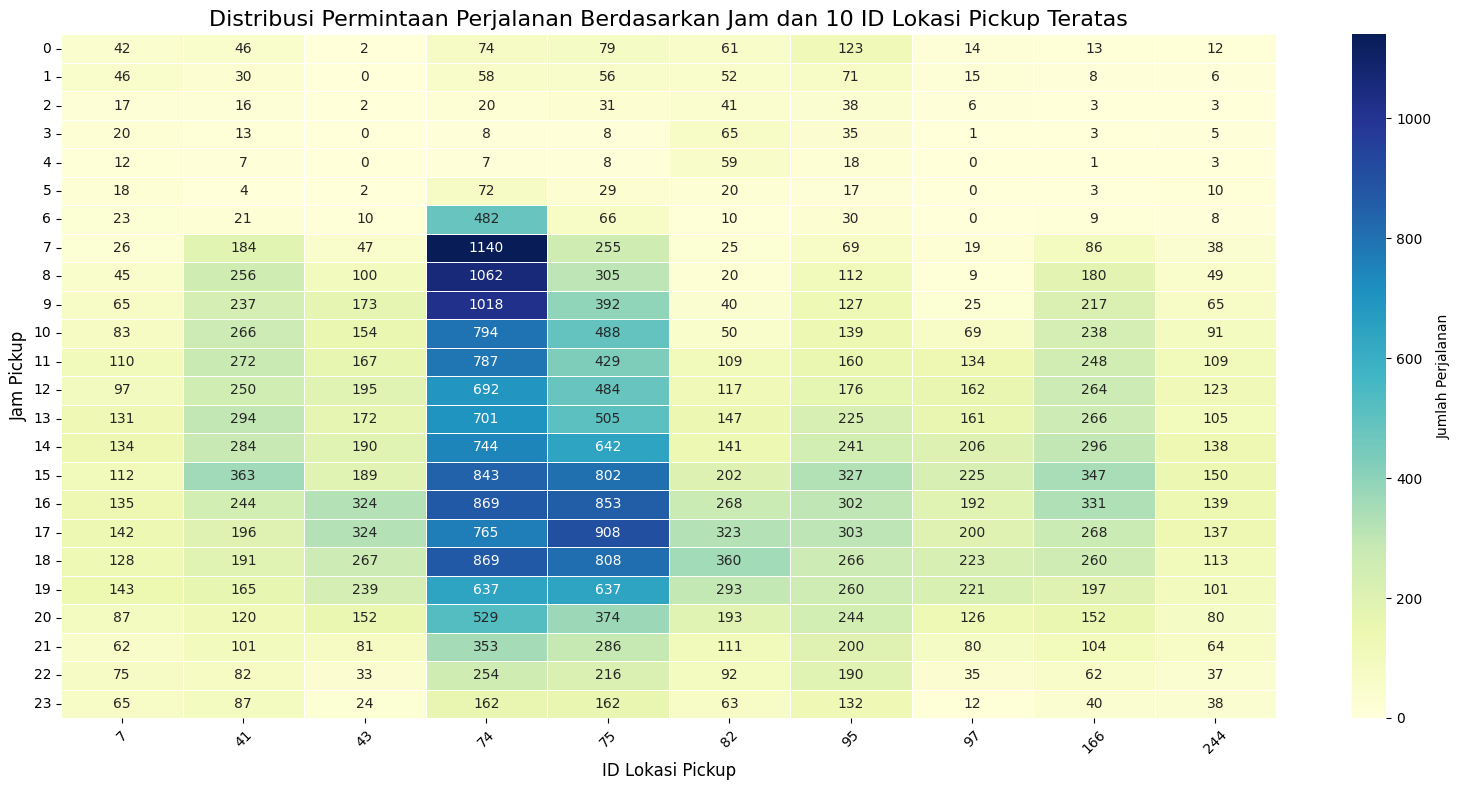

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom datetime berada dalam format datetime
data_bersih['lpep_pickup_datetime'] = pd.to_datetime(data_bersih['lpep_pickup_datetime'])

# Ekstraksi jam dari waktu pickup
data_bersih['pickup_hour'] = data_bersih['lpep_pickup_datetime'].dt.hour

# Mengambil 10 ID lokasi teratas dengan perjalanan terbanyak untuk visualisasi
top_locations = data_bersih['PULocationID'].value_counts().head(10).index

# Filter data untuk hanya mengambil lokasi teratas
filtered_data = data_bersih[data_bersih['PULocationID'].isin(top_locations)]

# Buat pivot table untuk menghitung jumlah perjalanan berdasarkan jam dan lokasi pickup
heatmap_data_filtered = filtered_data.pivot_table(index='pickup_hour', columns='PULocationID', values='VendorID', aggfunc='count').fillna(0)

# Plotting the filtered heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data_filtered, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Jumlah Perjalanan'}, linewidths=0.5, annot_kws={"size": 10})
plt.title('Distribusi Permintaan Perjalanan Berdasarkan Jam dan 10 ID Lokasi Pickup Teratas', fontsize=16)
plt.xlabel('ID Lokasi Pickup', fontsize=12)
plt.ylabel('Jam Pickup', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

<ipython-input-20-dbad96945d12>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='VendorID', y='fare_amount', data=data_bersih, palette='Set2')


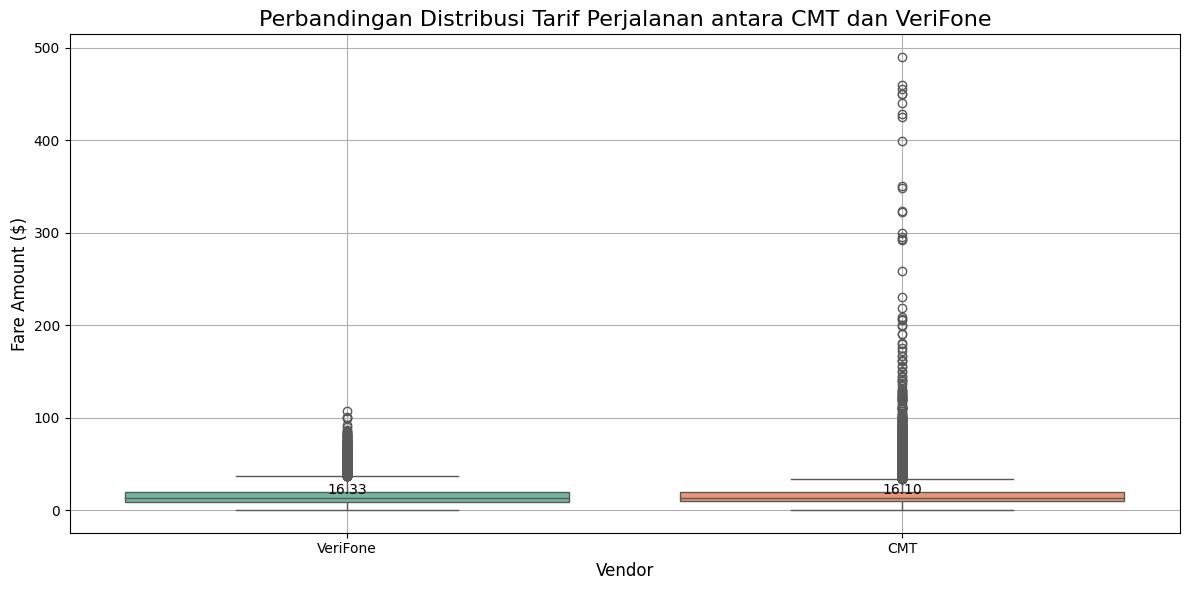

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memastikan kolom tarif adalah numerik dan tidak ada nilai NaN
data_bersih['fare_amount'] = pd.to_numeric(data_bersih['fare_amount'], errors='coerce')

# Membuat boxplot untuk membandingkan distribusi tarif antara CMT dan VeriFone
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x='VendorID', y='fare_amount', data=data_bersih, palette='Set2')

# Menghitung dan menambahkan rata-rata tarif sebagai titik pada boxplot
mean_fare = data_bersih.groupby('VendorID')['fare_amount'].mean()
for i in range(len(mean_fare)):
    plt.text(i, mean_fare.iloc[i] + 1, f'{mean_fare.iloc[i]:.2f}', color='black', ha='center')

plt.title('Perbandingan Distribusi Tarif Perjalanan antara CMT dan VeriFone', fontsize=16)
plt.xlabel('Vendor', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['VeriFone', 'CMT'])
plt.grid(True)

# Menyempurnakan tampilan
plt.tight_layout()
plt.show()

<ipython-input-22-419ccf42d0af>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')


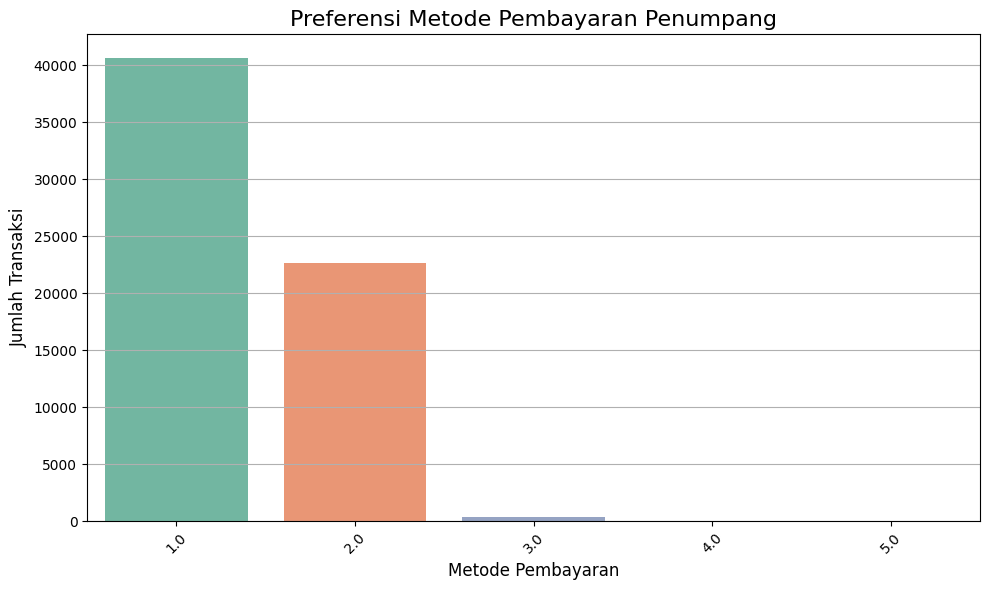

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memastikan kolom payment_type ada dalam format yang benar
payment_counts = data_bersih['payment_type'].value_counts()

# Membuat bar chart untuk menunjukkan preferensi metode pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')
plt.title('Preferensi Metode Pembayaran Penumpang', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45)  # Memutar label untuk lebih mudah dibaca
plt.grid(axis='y')  # Menambahkan grid hanya pada sumbu y
plt.tight_layout()
plt.show()

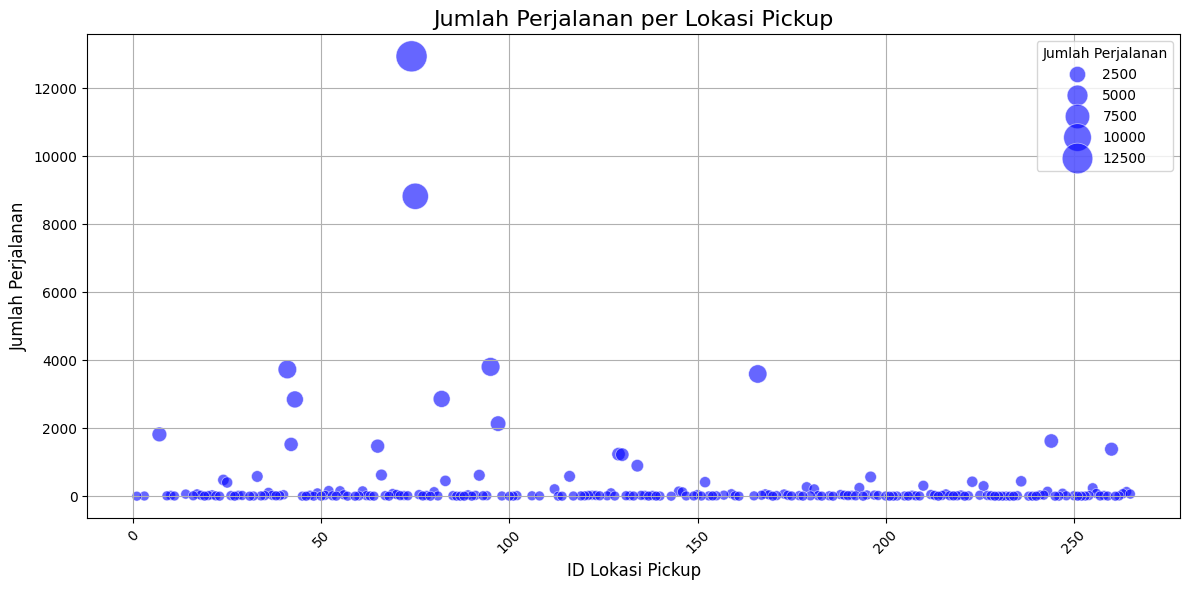

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah perjalanan berdasarkan lokasi pickup
location_counts = data_bersih['PULocationID'].value_counts().reset_index()
location_counts.columns = ['PULocationID', 'Jumlah Perjalanan']

# Membuat scatter plot untuk menunjukkan jumlah perjalanan per lokasi
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(
    data=location_counts,
    x='PULocationID',
    y='Jumlah Perjalanan',
    size='Jumlah Perjalanan',  # Menggunakan parameter size untuk ukuran titik
    sizes=(50, 500),  # Menentukan ukuran titik minimum dan maksimum
    alpha=0.6,
    color='blue'  # Warna tetap untuk semua titik
)

plt.title('Jumlah Perjalanan per Lokasi Pickup', fontsize=16)
plt.xlabel('ID Lokasi Pickup', fontsize=12)
plt.ylabel('Jumlah Perjalanan', fontsize=12)
plt.xticks(rotation=45)  # Memutar label ID lokasi agar lebih mudah dibaca
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
data_bersih.to_csv('nyctlctriprecord_cleaned.csv', index=False)

from google.colab import files
files.download('nyctlctriprecord_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>